# Ridge and Lasso Regression

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (8, 5)
%config InlineBackend.figure_format = 'retina'

# Diabetes dataset

In [3]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('diabetes.csv')
df

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
features = list(df.columns.values)
features.remove('DIS')
features

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']

# Standardized data

In [5]:
X = df.loc[:,'AGE':'GLU'].to_numpy()
y = df['DIS'].to_numpy()

featureMeans = X.mean(axis=0)
featureStd = X.std(axis=0)

Xs = (X - featureMeans) / featureStd

disMean = y.mean()
disStd = y.std()
ys = (y - disMean) / disStd

# Ordinary Least Squares Regression

In [6]:
from sklearn.linear_model import LinearRegression

ols_model = LinearRegression(fit_intercept=False)
ols_model.fit(Xs, ys);

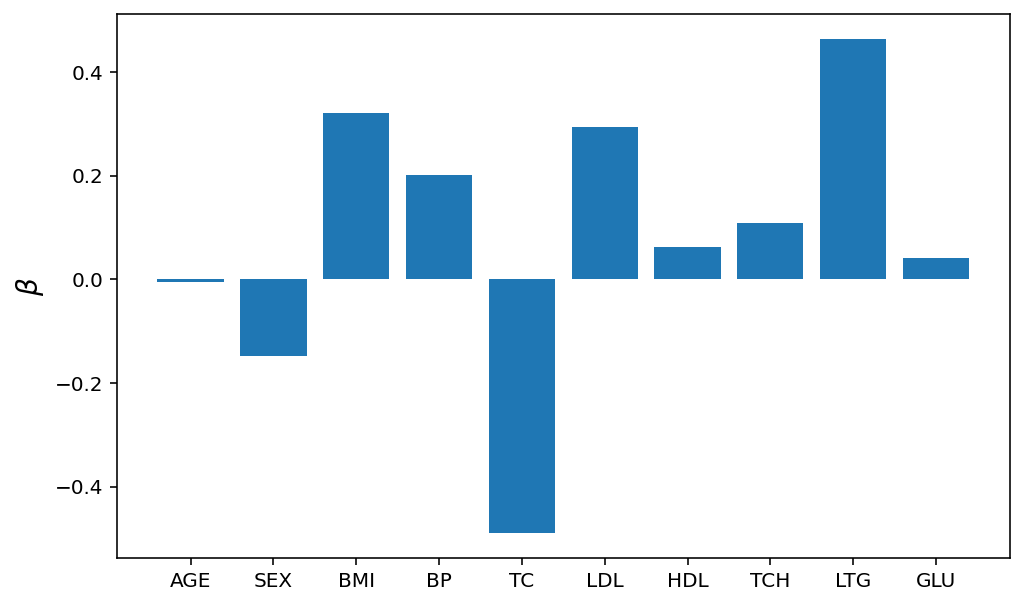

In [7]:
n = len(ols_model.coef_)
plt.bar(range(n), ols_model.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$');

### How well did the model do?

In [8]:
ols_predicted_ys = ols_model.predict(Xs)

In [9]:
ols_residuals = ys - ols_predicted_ys

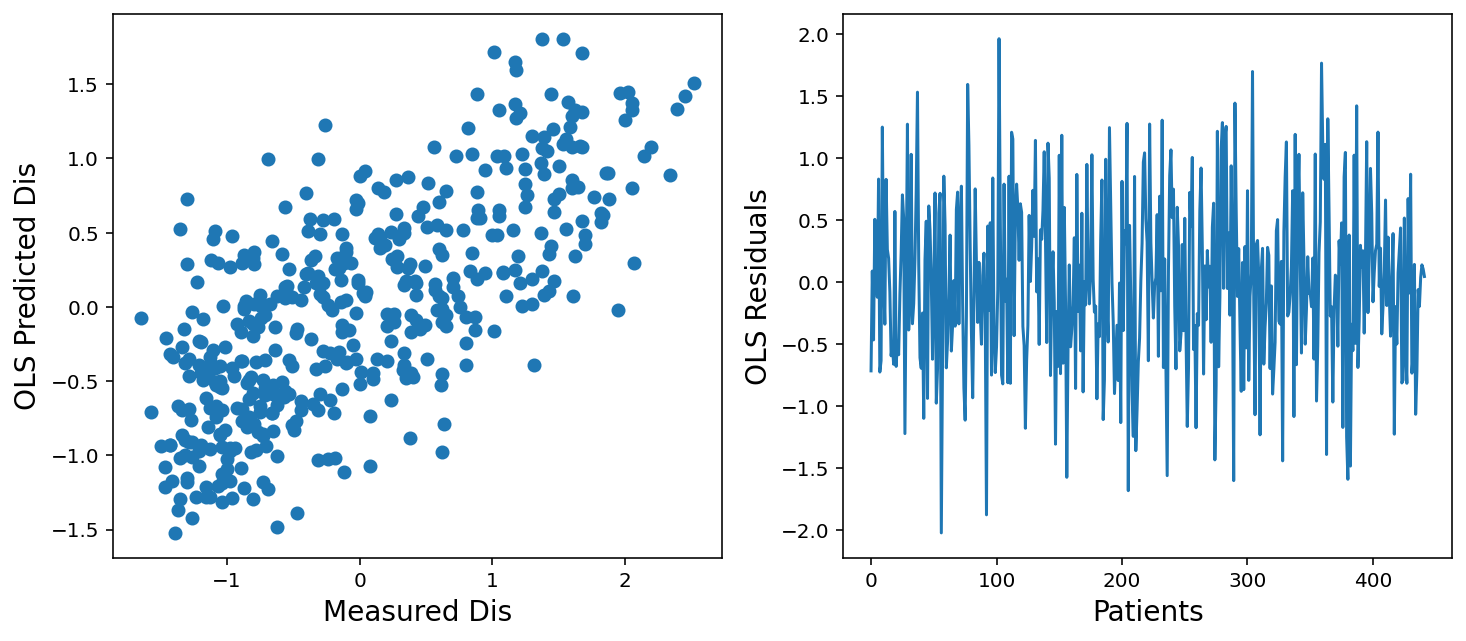

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(ys, ols_predicted_ys, 'o')
plt.xlabel('Measured Dis')
plt.ylabel('OLS Predicted Dis');
plt.subplot(1, 2, 2)
plt.plot(ols_residuals)
plt.xlabel('Patients')
plt.ylabel('OLS Residuals');

### How well did the model do? We can quantify using mean squared error (MSE).

In [11]:
ols_MSE = np.sum(ols_residuals**2) / len(ols_residuals)

# L2 (Ridge) Regularization

## Error to be minimized $= SSE + \alpha \sum \limits_j \beta_j^2$

## Let's try $\alpha = 10$.

In [12]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10, fit_intercept=False)
ridge_model.fit(Xs, ys);

In [13]:
ridge_predicted_ys = ridge_model.predict(Xs)
ridge_residuals = ys - ridge_predicted_ys

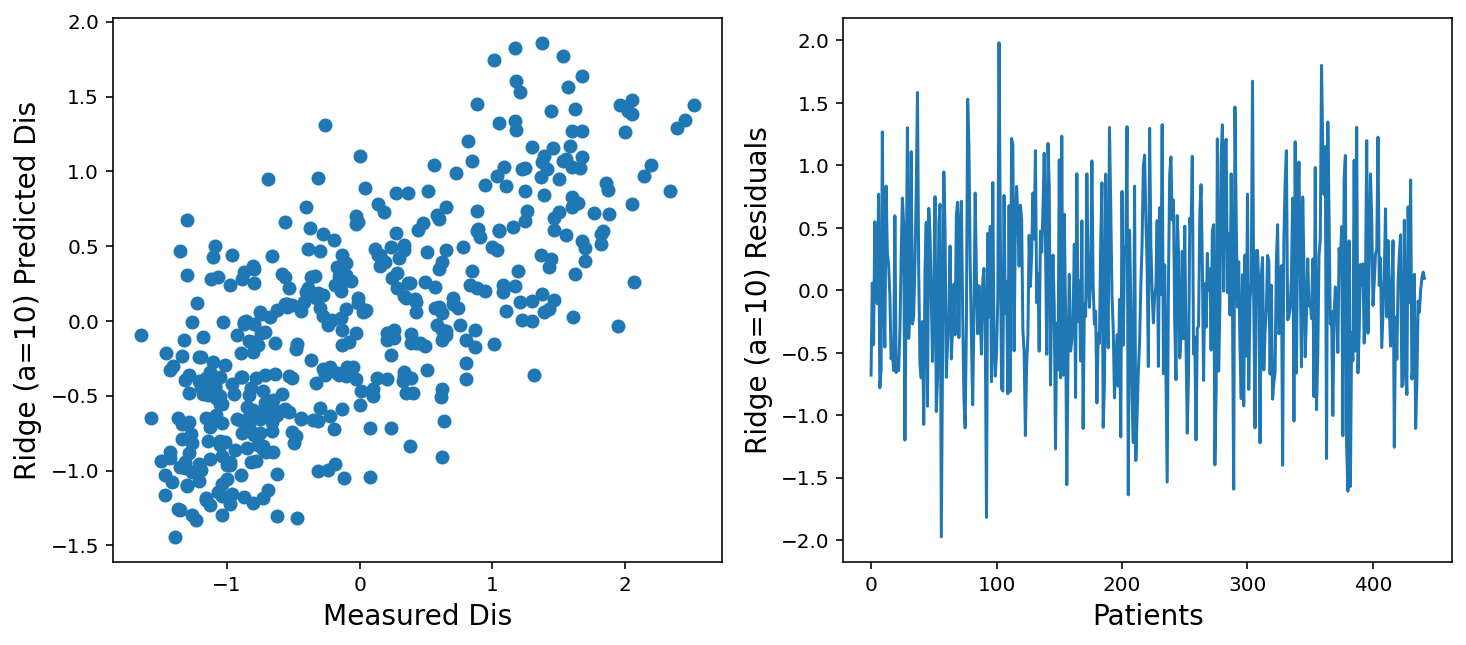

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(ys, ridge_predicted_ys, 'o')
plt.xlabel('Measured Dis')
plt.ylabel('Ridge (a=10) Predicted Dis');
plt.subplot(1, 2, 2)
plt.plot(ridge_residuals)
plt.xlabel('Patients')
plt.ylabel('Ridge (a=10) Residuals');

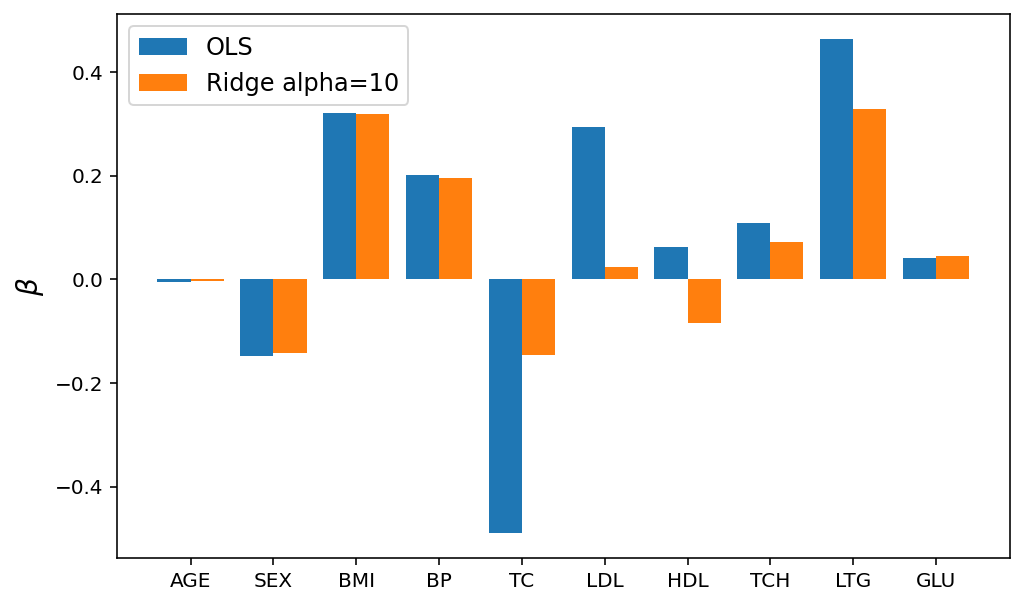

In [15]:
xticks = np.arange(len(features))
plt.bar(xticks-0.2, ols_model.coef_, width=0.4, label='OLS')
plt.bar(xticks+0.2, ridge_model.coef_, width=0.4, label='Ridge alpha=10')
plt.xticks(xticks, features)
plt.ylabel(r'$\beta$')
plt.legend();

### <font color=darkred>What did the Ridge model do to the weights of the highly correlated features TC and LDL as compared to the simple OLS model?</font>

## How well did the Ridge model do?

In [16]:
ridge_MSE = np.sum((ys - ridge_model.predict(Xs))**2) / len(ys)

dfMSE = pd.DataFrame(ols_MSE, columns=['OLS'], index=['MSE'])
dfMSE['Ridge(a=10)'] = ridge_MSE
dfMSE

,OLS,Ridge(a=10)
MSE,0.482252,0.484361


## Ok, but what value should we use for $\alpha$ in Ridge regression?

# <font color=darkred>Exercise</font>

1. Fit the diabetes data set using a Ridge model with $\alpha = 0.1$.
2. Compute the MSE for the model fit and add it to the *dfMSE* dataframe for comparison.

In [ ]:
model = ...

model.fit(...)

predicted_ys = ...

mse = ...

dfMSE['Ridge(a=0.1)'] = mse
dfMSE

## Let's try a bunch of different values for $\alpha$ and see how they do...

In [17]:
alphas = np.logspace(-5, 2, 50)
mse = np.zeros(alphas.shape)
for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(Xs, ys)
    residuals = ys - model.predict(Xs)
    mse[i] = np.sum(residuals**2) / len(residuals)

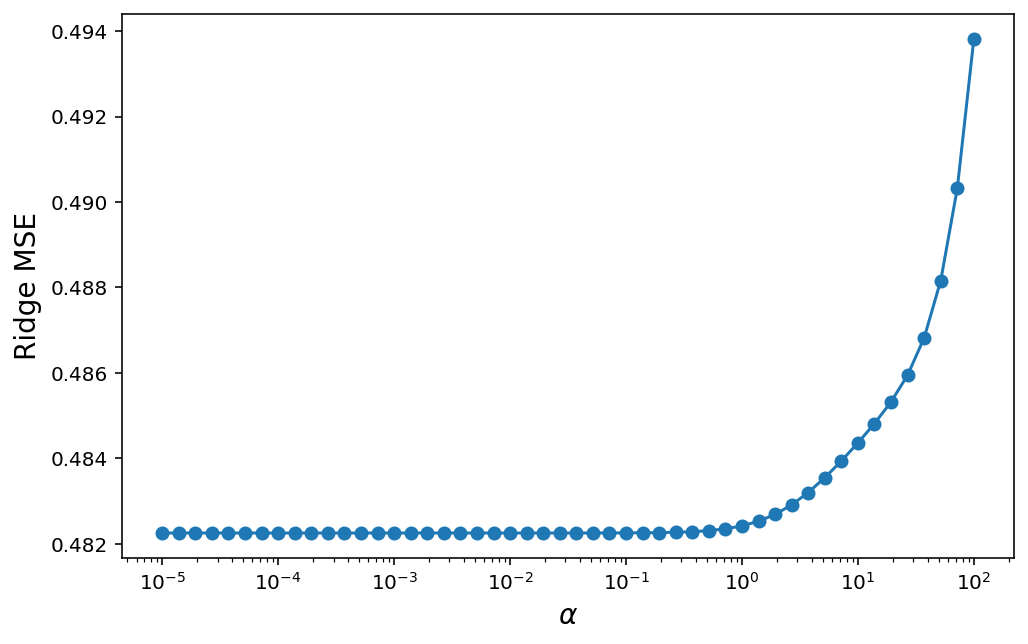

In [18]:
plt.plot(alphas, mse, 'o-')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Ridge MSE');

0

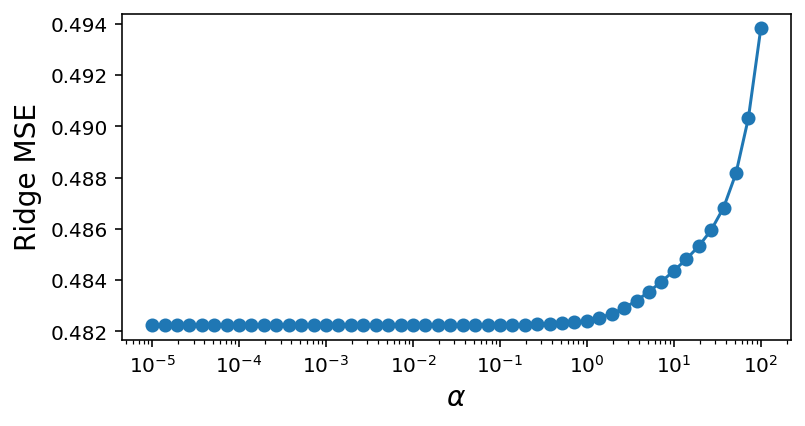

In [19]:
plt.figure(figsize=(6,3))
plt.plot(alphas, mse, 'o-')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Ridge MSE');

np.argmin(mse)

#### Smallest $\alpha$ is best!

#### But then absolute best would be $\alpha = 0$, which is just plain old OLS.

#### Did ridge regularization not help?

# Training Error vs. Testing Error

![train vs test error](images/train-vs-test-error.png)

# Split the patients into two groups (training and testing)

In [21]:
ntest = 200

Xs_train = Xs[:-ntest, :]
Xs_test = Xs[-ntest:, :]

Xs_train.shape, Xs_test.shape

((242, 10), (200, 10))

In [22]:
ys_train = y[:-ntest]
ys_test = y[-ntest:]

ys_train.shape, ys_test.shape

((242,), (200,))

# Split the patients into two groups (training and testing)

In [23]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, shuffle=True, test_size=0.5, random_state=1)

Xs_train.shape, Xs_test.shape, ys_train.shape, ys_test.shape

((221, 10), (221, 10), (221,), (221,))

# Now fit the model on the training group ONLY and evaluate the error on the test group ONLY.

In [24]:
alphas = np.logspace(-5, 2, 50)
mse = np.zeros(alphas.shape)
for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(Xs_train, ys_train)
    residuals = ys_test - model.predict(Xs_test)
    mse[i] = np.sum(residuals**2) / len(residuals)

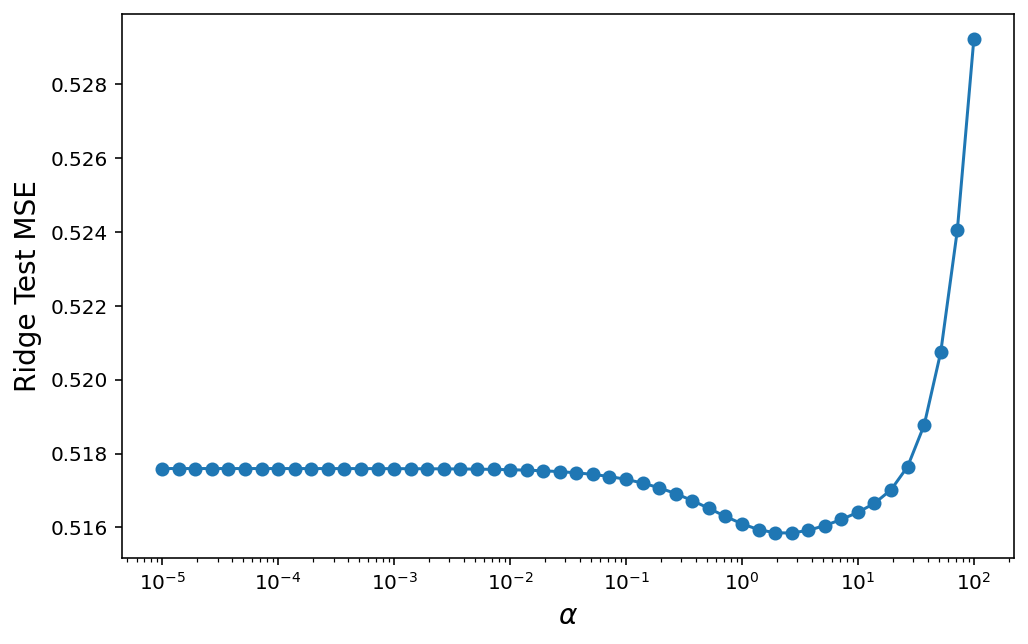

In [25]:
plt.plot(alphas, mse, 'o-')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Ridge Test MSE');

In [26]:
ind = np.argmin(mse)
bestAlpha = alphas[ind]
ind, bestAlpha

(38, 2.682695795279722)

# Select the Ridge model (i.e. $\alpha$) with the lowest MSE for the test group.

In [27]:
ridge_model = Ridge(alpha=bestAlpha, fit_intercept=False)

# Fit the selected Ridge model to the entire dataset.

In [28]:
ridge_model.fit(Xs, ys);

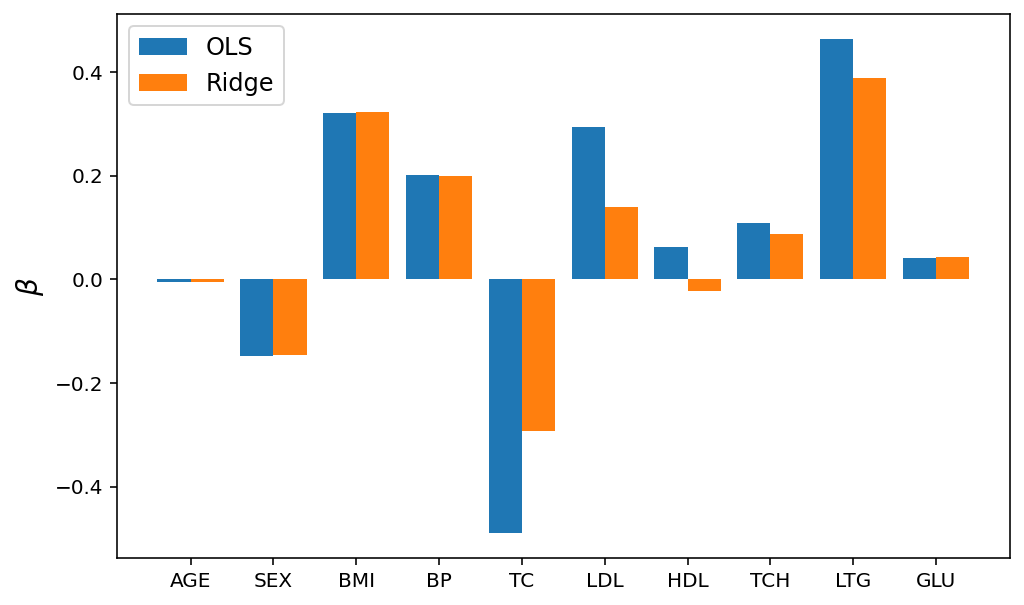

In [29]:
xticks = np.arange(len(features))
plt.bar(xticks-0.2, ols_model.coef_, width=0.4, label='OLS')
plt.bar(xticks+0.2, ridge_model.coef_, width=0.4, label='Ridge')
plt.xticks(xticks, features)
plt.ylabel(r'$\beta$')
plt.legend();

# But the MSE is still worse than for simple OLS!?

In [30]:
ridge_MSE = np.sum((ys - ridge_model.predict(Xs))**2) / len(ys)

dfMSE['Ridge(a=best)'] = ridge_MSE
dfMSE

,OLS,Ridge(a=10),Ridge(a=best)
MSE,0.482252,0.484361,0.482911


## Why might the Ridge model still be preferred over the OLS model?

## How will each model fair when given new data that the model was not trained on?

# <font color=darkred>Exercise</font>

1. Refit the OLS and Ridge (use best alpha) models using ONLY the training dataset.
2. Compute and compare the MSE for each model using ONLY the testing dataset.

In [ ]:
ols_model.fit(...)
ridge_model.fit(...)
# model predictions for test group
ols_predicted_ys_test = ...
ridge_predicted_ys_test = ...
# test MSE
ols_test_MSE = ...
ridge_test_MSE = ...

dfMSE.loc['test MSE', 'OLS'] = ols_test_MSE
dfMSE.loc['test MSE', 'Ridge(a=best)'] = ridge_MSE
dfMSE

# L1 (Lasso) Regularization

## Error to be minimized $= SSE + \alpha \sum \limits_j |\beta_j|$

In [31]:
from sklearn.linear_model import Lasso

# Fit the model on the training group ONLY and evaluate the error on the test group ONLY.

In [33]:
alphas = np.logspace(-5, -1, 50)
mse = np.zeros(alphas.shape)
for i, alpha in enumerate(alphas):
    model = ...
    model.fit(...)
    residuals = ...
    mse[i] = np.sum(residuals**2) / len(residuals)

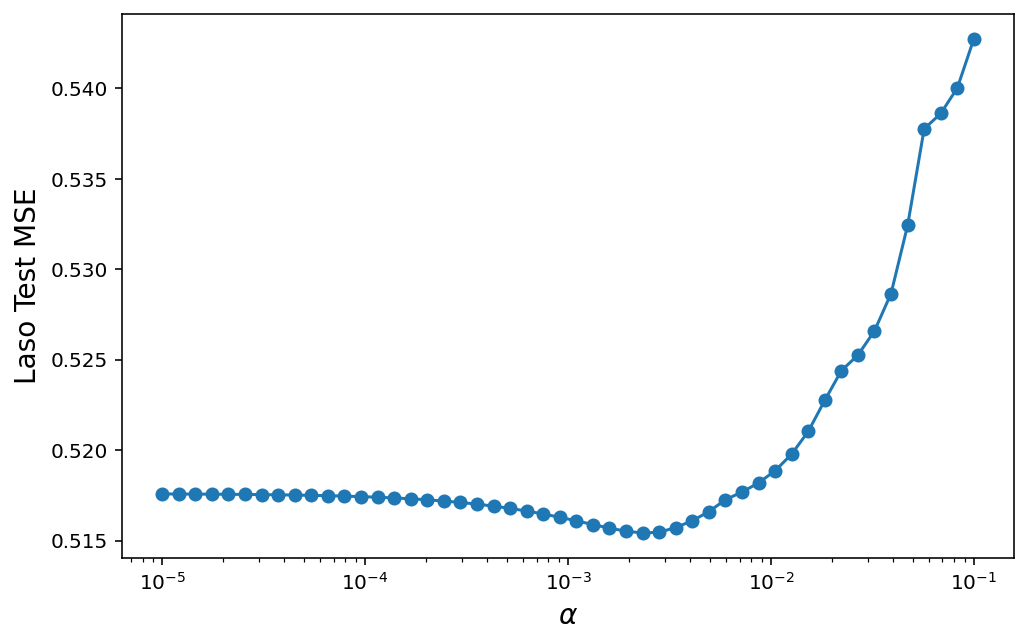

In [34]:
plt.plot(alphas, mse, 'o-')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Laso Test MSE');

In [35]:
ind = ...
bestAlpha = ...
ind, bestAlpha

(29, 0.002329951810515372)

# Select the Lasso model (i.e. $\alpha$) with the lowest MSE for the test group.

In [36]:
lasso_model = Lasso(alpha=bestAlpha, fit_intercept=False)

# Fit the selected Lasso model to the entire dataset.

In [37]:
lasso_model.fit(...);

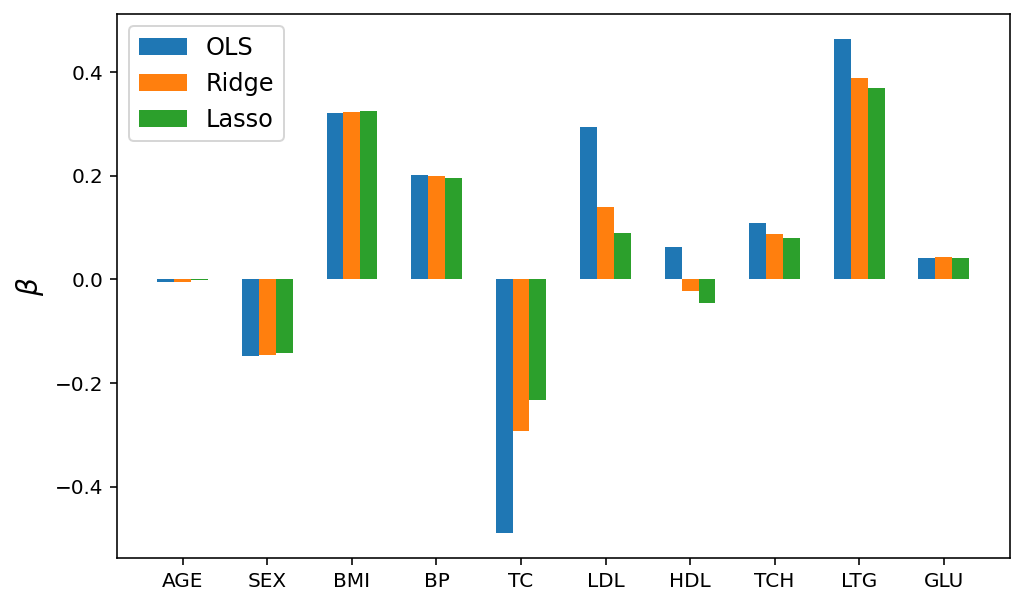

In [38]:
xticks = np.arange(len(features))
plt.bar(xticks-0.2, ols_model.coef_, width=0.2, label='OLS')
plt.bar(xticks+0.0, ridge_model.coef_, width=0.2, label='Ridge')
plt.bar(xticks+0.2, lasso_model.coef_, width=0.2, label='Lasso')
plt.xticks(xticks, features)
plt.ylabel(r'$\beta$')
plt.legend();

In [40]:
ols_model.coef_[0], ridge_model.coef_[0], lasso_model.coef_[0]

(-0.006182925453203546, -0.004935729932842735, -0.001593094964367862)

# <font color=darkred>Exercise</font>

Compute the MSE for the Lasso model using the testing dataset and compare with OLS and Ridge models.

In [ ]:
lasso_MSE = ...

dfMSE.loc['test MSE', 'Lasso(a=best)'] = lasso_MSE
dfMSE

# Lasso vs. Ridge vs. Elastic Net

![](images/lasso-ridge-enet.png)